In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import datetime

In [8]:
def plot_random_interval(df):
    
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%H:%M:%S.%f').dt.time
    
    def time_to_seconds(t):
        return t.hour * 3600 + t.minute * 60 + t.second + t.microsecond/1000000
    
    df['seconds'] = df['Timestamp'].apply(time_to_seconds)
    
    total_duration = df['seconds'].max() - df['seconds'].min()
    max_start_time = total_duration - 12
    random_start = random.uniform(0, max_start_time)
    
    start_seconds = df['seconds'].min() + random_start
    end_seconds = start_seconds + 12
    mask = (df['seconds'] >= start_seconds) & (df['seconds'] <= end_seconds)
    df_interval = df[mask]
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(df_interval['seconds'], df_interval['AccX'], label='AccX')
    plt.plot(df_interval['seconds'], df_interval['AccY'], label='AccY')
    plt.plot(df_interval['seconds'], df_interval['AccZ'], label='AccZ')
    plt.title('Accelerometer Data')
    plt.xlabel('Seconds')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(df_interval['seconds'], df_interval['GyroX'], label='GyroX')
    plt.plot(df_interval['seconds'], df_interval['GyroY'], label='GyroY')
    plt.plot(df_interval['seconds'], df_interval['GyroZ'], label='GyroZ')
    plt.title('Gyroscope Data')
    plt.xlabel('Seconds')
    plt.ylabel('Angular Velocity')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('sensor_data.png')
    plt.show()
    plt.close()

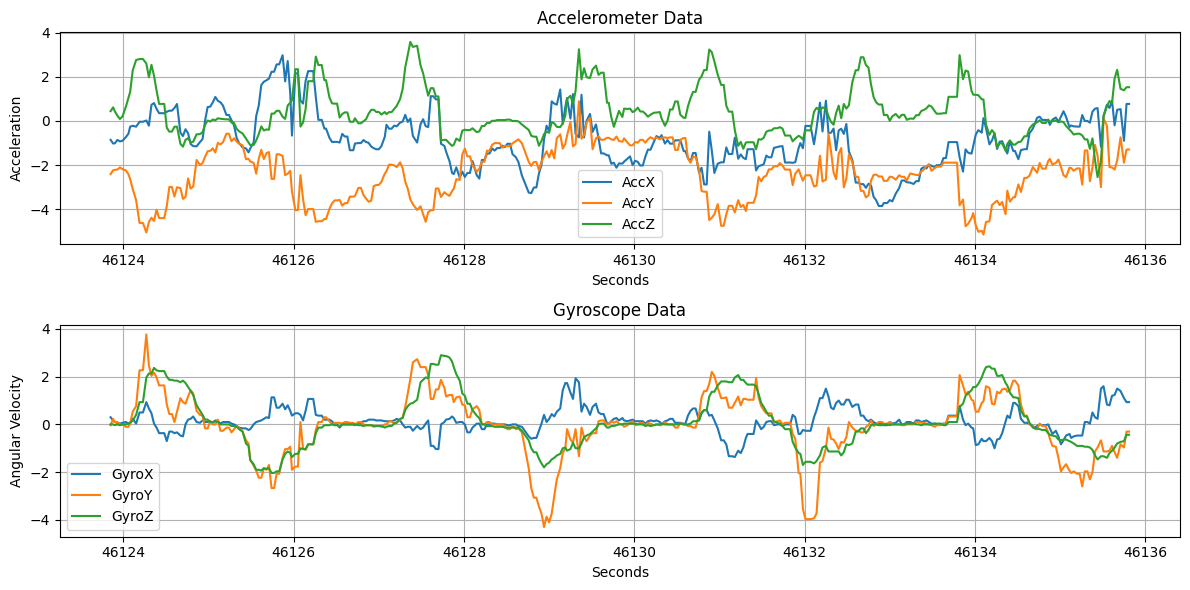

In [13]:
df_up = pd.read_csv(r"C:\Users\WilliamSanteramo\OneDrive - ITS Angelo Rizzoli\Documenti\UFS\15 IoT\SmartSenseML\UP\1.csv", index_col=0)

plot_random_interval(df_up)

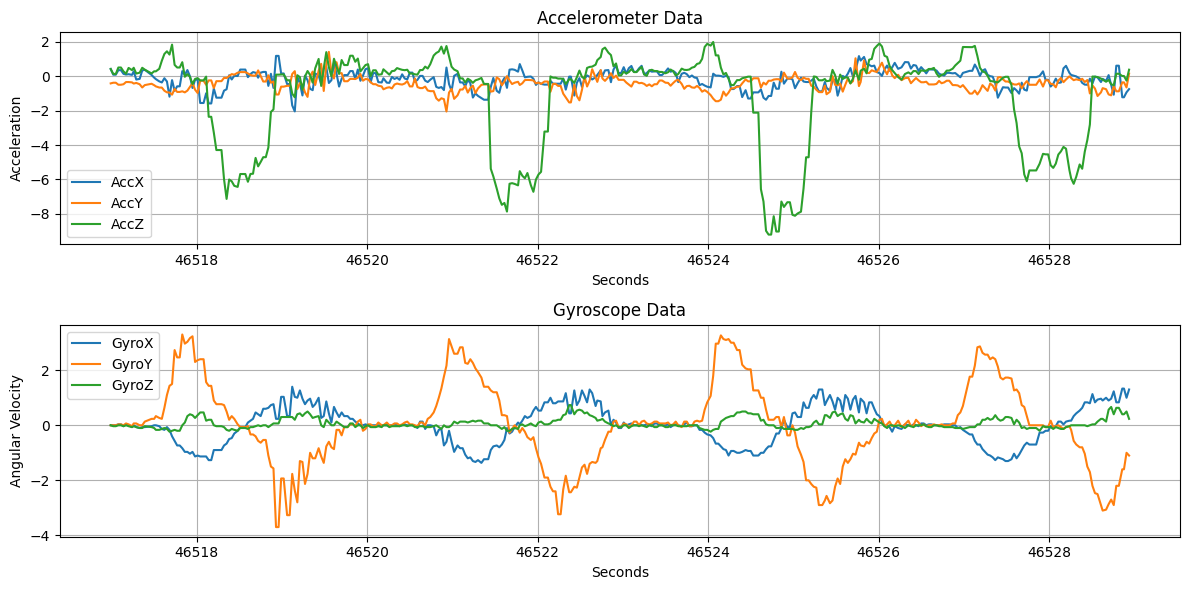

In [10]:
df_left = pd.read_csv(r"C:\Users\WilliamSanteramo\OneDrive - ITS Angelo Rizzoli\Documenti\UFS\15 IoT\SmartSenseML\UP\2.csv", index_col=0)

plot_random_interval(df_left)

In [11]:
df_up.head()

,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,seconds
0,12:47:27.220000,-7.98680,-6.52642,0.28367,0.03333,0.0,-0.0,46047.22
1,12:47:27.260000,-7.98680,-6.52642,0.28367,0.03333,0.0,-0.0,46047.26
2,12:47:27.280000,-8.09339,-6.70965,0.28997,0.03333,0.0,-0.0,46047.28
3,12:47:27.320000,-8.09339,-6.70965,0.28997,0.03333,0.0,-0.0,46047.32
4,12:47:27.340000,-9.26388,-6.97198,0.30954,0.03333,0.0,-0.0,46047.34


In [12]:
df_left.head()

,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,seconds
0,12:54:42.530000,3.38200,-2.03458,0.20468,0.03333,0.06667,-0.0,46482.53
1,12:54:42.560000,3.30400,-1.99458,0.17857,0.00000,0.00000,-0.0,46482.56
2,12:54:42.600000,3.51000,-2.06358,0.39041,0.03333,0.00000,-0.0,46482.60
3,12:54:42.620000,3.26979,-2.03458,0.41052,0.03333,0.03333,-0.0,46482.62
4,12:54:42.660000,2.87364,-1.99458,0.17760,0.00000,0.06667,-0.0,46482.66


In [14]:
total_seconds = 46520

# Calcolo delle ore, minuti, secondi e microsecondi
hours = int(total_seconds // 3600)
minutes = int((total_seconds % 3600) // 60)
seconds = int(total_seconds % 60)
microseconds = int((total_seconds - int(total_seconds)) * 1_000_000)

# Formattazione del risultato
result = f"{hours:02}:{minutes:02}:{seconds:02}.{microseconds:06}"
print(result)

12:55:20.000000


In [20]:
time_result = datetime.strptime(result, "%H:%M:%S.%f").time()
print(df_left.shape)
campione = df_left[df_left['Timestamp'] <= time_result]
campione.head()

(3703, 8)


,Timestamp,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,seconds
0,12:54:42.530000,3.38200,-2.03458,0.20468,0.03333,0.06667,-0.0,46482.53
1,12:54:42.560000,3.30400,-1.99458,0.17857,0.00000,0.00000,-0.0,46482.56
2,12:54:42.600000,3.51000,-2.06358,0.39041,0.03333,0.00000,-0.0,46482.60
3,12:54:42.620000,3.26979,-2.03458,0.41052,0.03333,0.03333,-0.0,46482.62
4,12:54:42.660000,2.87364,-1.99458,0.17760,0.00000,0.06667,-0.0,46482.66


In [23]:
n = len(df_left)
df_one_third = df_left.iloc[:n // 3] 

print(df_one_third.shape)

(1234, 8)


In [21]:
campione.to_csv("campione.csv")